In [1]:
from utils import *
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from joblib import Parallel, delayed

In [2]:
df = load_robustnes('None')
baselines = {}

for dataset in df.dataset.unique():
    dfd = df.query(f'dataset=="{dataset}" and method=="baseline"')
    baseline = dfd.accuracy.mean()
    dfd = df.query(f'dataset=="{dataset}"').groupby(['dataset', 'method']).mean(numeric_only=True).reset_index()
    best = dfd.accuracy.max()
    baselines[dataset] = (baseline, best)

Loaded 1640 files


In [3]:
transform_name = 'MagnitudeWarp'
xscale = 'log'
df = load_robustnes(transform_name)
df

Loaded 14759 files


dataset       method            transform  seed  accuracy  \
0                    Yoga        drcif  MagnitudeWarp;100.0     0  0.507000   
0             SwedishLeaf     baseline   MagnitudeWarp;50.0     0  0.052800   
0     EOGHorizontalSignal          cnn  MagnitudeWarp;500.0     0  0.082873   
0   ChlorineConcentration  rocket-k500  MagnitudeWarp;100.0     0  0.267188   
0    RefrigerationDevices          cnn   MagnitudeWarp;10.0     0  0.378667   
..                    ...          ...                  ...   ...       ...   
0             ShapeletSim          cnn   MagnitudeWarp;10.0     0  0.461111   
0         GestureMidAirD2       weasel    MagnitudeWarp;0.1     0  0.200000   
0       DodgerLoopWeekend    inception    MagnitudeWarp;1.0     0  0.471014   
0          PigArtPressure      tsfresh    MagnitudeWarp;5.0     0  0.043269   
0                FacesUCR         eknn  MagnitudeWarp;100.0     0  0.212195   

                                                 pred  \
0                                   [1 1 1 ... 1 1 1]   
0   [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 ...   
0   [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8...   
0                                   [1 1 1 ... 3 1 1]   
0   [1 1 1 1 3 3 3 3 3 2 1 1 1 2 1 1 2 3 2 3 3 3 1...   
..                                                ...   
0   [1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1...   
0   [22 17  8 17  8 21 22 15 23 23  8 13 22  1 15 ...   
0   [2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2...   
0   [18  2 29  8 34  5  6 47 27 27  2 42  6 47 27 ...   
0                             [13  7  6 ...  9 13  7]   

                                                 true  level  \
0                                   [1 2 1 ... 2 2 2]  100.0   
0   [10 11  8 12 14  1  5 11 13  6  1 15 10  7  2 ...   50.0   
0   [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2 ...  500.0   
0                                   [2 2 1 ... 3 3 3]  100.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   10.0   
..                                                ...    ...   
0   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   10.0   
0   [ 5 12 18 13 22 20 11 10 16 22 11 12 16  2  1 ...    0.1   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    1.0   
0   [ 1  1  1  1  2  2  2  2  3  3  3  3  4  4  4 ...    5.0   
0                                   [8 7 6 ... 9 9 7]  100.0   

         transform_type  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;500.0  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;10.0  
..                  ...  
0    MagnitudeWarp;10.0  
0     MagnitudeWarp;0.1  
0     MagnitudeWarp;1.0  
0     MagnitudeWarp;5.0  
0   MagnitudeWarp;100.0  

[14759 rows x 9 columns]

In [4]:
df = df.query('method.str.contains("-") == False', engine='python')

In [5]:
df = filter_out_incomplete_datasets(df)
df

['drcif' 'baseline' 'cnn' 'eknn' 'catch22' 'tsforest' 'rocket' 'tsfresh'
 'hivecotev2' 'weasel' 'inception']
['MagnitudeWarp;100.0' 'MagnitudeWarp;50.0' 'MagnitudeWarp;500.0'
 'MagnitudeWarp;10.0' 'MagnitudeWarp;0.5' 'MagnitudeWarp;1.0'
 'MagnitudeWarp;0.0' 'MagnitudeWarp;0.1' 'MagnitudeWarp;5.0']
99
not complete datasets: {'UWaveGestureLibraryY', 'Fungi', 'Rock'}


dataset     method            transform  seed  accuracy  \
0                   Yoga      drcif  MagnitudeWarp;100.0     0  0.507000   
0            SwedishLeaf   baseline   MagnitudeWarp;50.0     0  0.052800   
0    EOGHorizontalSignal        cnn  MagnitudeWarp;500.0     0  0.082873   
0   RefrigerationDevices        cnn   MagnitudeWarp;10.0     0  0.378667   
0             ScreenType       eknn  MagnitudeWarp;500.0     0  0.349333   
..                   ...        ...                  ...   ...       ...   
0            ShapeletSim        cnn   MagnitudeWarp;10.0     0  0.461111   
0        GestureMidAirD2     weasel    MagnitudeWarp;0.1     0  0.200000   
0      DodgerLoopWeekend  inception    MagnitudeWarp;1.0     0  0.471014   
0         PigArtPressure    tsfresh    MagnitudeWarp;5.0     0  0.043269   
0               FacesUCR       eknn  MagnitudeWarp;100.0     0  0.212195   

                                                 pred  \
0                                   [1 1 1 ... 1 1 1]   
0   [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 ...   
0   [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8...   
0   [1 1 1 1 3 3 3 3 3 2 1 1 1 2 1 1 2 3 2 3 3 3 1...   
0   [1 2 3 1 3 3 2 2 2 3 3 2 1 2 2 1 3 3 1 2 2 3 2...   
..                                                ...   
0   [1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1...   
0   [22 17  8 17  8 21 22 15 23 23  8 13 22  1 15 ...   
0   [2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2...   
0   [18  2 29  8 34  5  6 47 27 27  2 42  6 47 27 ...   
0                             [13  7  6 ...  9 13  7]   

                                                 true  level  \
0                                   [1 2 1 ... 2 2 2]  100.0   
0   [10 11  8 12 14  1  5 11 13  6  1 15 10  7  2 ...   50.0   
0   [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2 ...  500.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   10.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  500.0   
..                                                ...    ...   
0   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   10.0   
0   [ 5 12 18 13 22 20 11 10 16 22 11 12 16  2  1 ...    0.1   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    1.0   
0   [ 1  1  1  1  2  2  2  2  3  3  3  3  4  4  4 ...    5.0   
0                                   [8 7 6 ... 9 9 7]  100.0   

         transform_type  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;500.0  
0    MagnitudeWarp;10.0  
0   MagnitudeWarp;500.0  
..                  ...  
0    MagnitudeWarp;10.0  
0     MagnitudeWarp;0.1  
0     MagnitudeWarp;1.0  
0     MagnitudeWarp;5.0  
0   MagnitudeWarp;100.0  

[12375 rows x 9 columns]

In [6]:
n_levels = len(list(df.level.unique()))
methods = sorted(df.method.unique())

In [7]:
print(df.method.unique())

['drcif' 'baseline' 'cnn' 'eknn' 'catch22' 'tsforest' 'rocket' 'tsfresh'
 'hivecotev2' 'weasel' 'inception']


In [8]:
for dataset in df.dataset.unique():
    dfd = df.query(f'dataset=="{dataset}"').sort_values('accuracy')

In [9]:
dfd

dataset     method            transform  seed  accuracy  \
0   DodgerLoopWeekend  inception  MagnitudeWarp;100.0     0  0.260870   
0   DodgerLoopWeekend  inception   MagnitudeWarp;50.0     0  0.260870   
0   DodgerLoopWeekend  inception  MagnitudeWarp;500.0     0  0.260870   
0   DodgerLoopWeekend  inception   MagnitudeWarp;10.0     0  0.268116   
0   DodgerLoopWeekend  inception    MagnitudeWarp;5.0     0  0.282609   
..                ...        ...                  ...   ...       ...   
0   DodgerLoopWeekend       eknn    MagnitudeWarp;0.1     0  0.985507   
0   DodgerLoopWeekend      drcif    MagnitudeWarp;0.1     0  0.985507   
0   DodgerLoopWeekend       eknn    MagnitudeWarp;0.0     0  0.985507   
0   DodgerLoopWeekend   tsforest    MagnitudeWarp;0.0     0  0.985507   
0   DodgerLoopWeekend   tsforest    MagnitudeWarp;0.1     0  0.985507   

                                                 pred  \
0   [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...   
0   [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...   
0   [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...   
0   [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...   
0   [2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...   
..                                                ...   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1...   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1...   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1...   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1...   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1...   

                                                 true  level  \
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  100.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   50.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  500.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   10.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    5.0   
..                                                ...    ...   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    0.1   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    0.1   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    0.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    0.0   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...    0.1   

         transform_type  
0   MagnitudeWarp;100.0  
0    MagnitudeWarp;50.0  
0   MagnitudeWarp;500.0  
0    MagnitudeWarp;10.0  
0     MagnitudeWarp;5.0  
..                  ...  
0     MagnitudeWarp;0.1  
0     MagnitudeWarp;0.1  
0     MagnitudeWarp;0.0  
0     MagnitudeWarp;0.0  
0     MagnitudeWarp;0.1  

[99 rows x 9 columns]

In [10]:
dc = {'dataset': [], 'method': [], 'values': [], 'level': []}

for dataset in df.dataset.unique():
    dfd = df.query(f'dataset=="{dataset}"')
    min_acc, max_acc = baselines[dataset]

    if (min_acc-max_acc)==0:
        continue
    print('----',dataset, min_acc, max_acc)
    for method in dfd.method.unique():
        dfdm = dfd.query(f'method=="{method}"').sort_values('level')
        v = (np.array(dfdm.accuracy)-min_acc)/((max_acc-min_acc)+0.1)
        v = (np.array(dfdm.accuracy)-min_acc)/((max_acc-min_acc))
        #print(v)
        if len(v)==n_levels:
            dc['dataset'].extend(len(v)*[dataset])
            dc['method'].extend(len(v)*[method])
            dc['values'].extend(v)
            dc['level'].extend(list(dfdm.level))
        else:
            print(dataset, method)

---- Yoga 0.5356666666666666 0.9166666666666666
---- SwedishLeaf 0.0528 0.9728
---- EOGHorizontalSignal 0.0828729281767955 0.643646408839779
---- RefrigerationDevices 0.3333333333333333 0.6213333333333333
---- ScreenType 0.3333333333333333 0.5813333333333334
---- Adiac 0.0204603580562659 0.8363171355498721
---- InsectEPGRegularTrain 0.4738955823293173 1.0
---- ProximalPhalanxOutlineAgeGroup 0.4878048780487805 0.8585365853658536
---- BeetleFly 0.5 0.95
---- AllGestureWiimoteY 0.1 0.7985714285714286
---- ECG200 0.64 0.93
---- Symbols 0.1738693467336683 0.9798994974874372
---- PickupGestureWiimoteZ 0.1 0.74
---- Chinatown 0.2740524781341107 0.9883381924198252
---- DiatomSizeReduction 0.3006535947712418 0.977124183006536
---- Mallat 0.1232409381663113 0.9650319829424308
---- InsectEPGSmallTrain 0.4738955823293173 0.9799196787148594
---- MiddlePhalanxOutlineCorrect 0.570446735395189 0.8419243986254296
---- Wafer 0.8921155094094744 1.0
---- PLAID 0.1620111731843575 0.8584729981378026
---- Ol

In [11]:
dfr = pd.DataFrame(dc)
dfr

dataset      method    values  level
0                   Yoga       drcif  0.886264    0.0
1                   Yoga       drcif  0.840770    0.1
2                   Yoga       drcif  0.510936    0.5
3                   Yoga       drcif  0.224847    1.0
4                   Yoga       drcif -0.036745    5.0
...                  ...         ...       ...    ...
12271  DodgerLoopWeekend  hivecotev2 -0.147059    5.0
12272  DodgerLoopWeekend  hivecotev2 -0.500000   10.0
12273  DodgerLoopWeekend  hivecotev2 -0.294118   50.0
12274  DodgerLoopWeekend  hivecotev2 -0.411765  100.0
12275  DodgerLoopWeekend  hivecotev2 -0.323529  500.0

[12276 rows x 4 columns]

baseline
catch22
cnn
drcif
eknn
hivecotev2
inception
rocket
tsforest
tsfresh
weasel


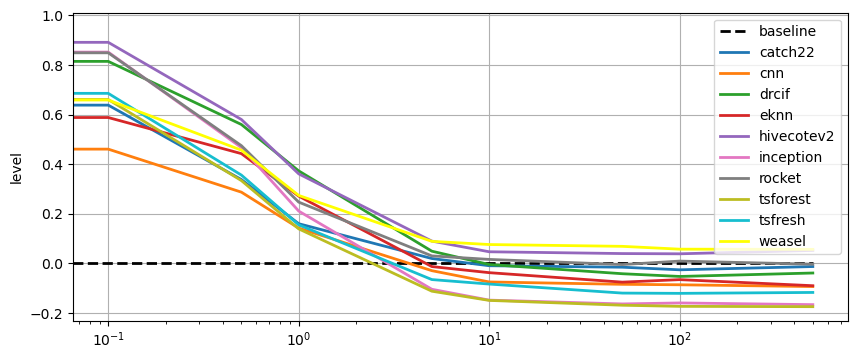

In [12]:
plt.figure(figsize=(10, 4))
for method in methods:
    print(method)
    v = dfr.query(f'method=="{method}"').groupby('level').mean(numeric_only=True).reset_index()
    y = list(v.level)
    x = list(v['values'])
    plt.plot(y, x, label=method, **display_mapped_fields[method])
plt.legend()
plt.grid()
plt.xscale(xscale)
plt.ylabel('CE')
plt.ylabel('level')
plt.savefig(f'figures/{transform_name}_relative_error.pdf', bbox_inches='tight', pad_inches=0)

In [13]:
#plt.figure(figsize=(10, 4))
#for method in df.method.unique():
#    print(method)
#    dfrs = dfr.query(f'method=="{method}"')
#    mn = np.array(list(dfrs['values'])).mean(axis=0)
#    plt.plot(mn, label=method)
#plt.legend()
#plt.grid()
#plt.savefig(f'figures/{transform_name}_relative_error.pdf', bbox_inches='tight', pad_inches=0)

In [14]:
xyvc=yxcvyxc

NameError: name 'yxcvyxc' is not defined

In [ ]:
sdfsdf=sdfsdf

In [ ]:
transform_name = 'None'
#transform_name = 'Spike'
df = load_robustnes(transform_name)
df

In [ ]:
accs = df.groupby(['method', 'dataset']).mean(numeric_only=True).reset_index()
display_table = accs.pivot(index='dataset', columns='method', values='accuracy').reset_index().sort_values('dataset')
display_table

In [ ]:
latex_output = display_table.to_latex(float_format="%.3f")
print(latex_output)

In [ ]:
def get_ranks(df, reps =30):
    algo_ranks = {x: 0 for x in df.method.unique()}
    for _ in range(reps):
        pdf = df.sample(frac=1).reset_index(drop=True)
        l = pdf.drop_duplicates(subset='method', keep='first').sort_values('accuracy', ascending=False)
        for i, (_, row) in enumerate(l.iterrows()):
            algo_ranks[row['method']] += (i+1)/reps
    return algo_ranks

def get_all_ranks(df):
    new_df = {'dataset': [], 'transform': [], 'method': [], 'rank': []}
    for dataset in df.dataset.unique():
        for transform in df['transform'].unique():
            subset = df.query(f'dataset=="{dataset}" and transform=="{transform}"').sample(frac=1).reset_index(drop=True)
            ranks = get_ranks(subset)
            for k, v in ranks.items():
                new_df['dataset'].append(dataset)
                new_df['transform'].append(transform)
                new_df['method'].append(k)
                new_df['rank'].append(v)
    return pd.DataFrame(new_df)

In [ ]:
df_ranks = get_all_ranks(df)
df_ranks.groupby(['method', 'dataset']).mean(numeric_only=True).reset_index()

In [ ]:
display_table = df_ranks.pivot(index='dataset', columns='method', values='rank').reset_index()
latex_output = display_table.to_latex(float_format="%.3f")
print(latex_output)

In [ ]:
from sktime.classification.feature_based import MatrixProfileClassifier
from sktime.datasets import load_unit_test



X_train, X_test, y_train, y_test = read_dataset('ScreenType')
X_train, X_test = interpolate_scale(X_train, X_test)
#clf = MatrixProfileClassifier(n_jobs=-1)  
#clf.fit(X_train, y_train)  
#y_pred = clf.predict(X_test)
#print(y_pred)

In [ ]:
from sktime.transformations.panel.matrix_profile import MatrixProfile

X = MatrixProfile(m=10).fit(X_train, y_train).transform(X_train)


In [ ]:
X

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class ReplaceNaNInfWithZeroTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Replace NaN and inf values with 0
        X[np.isnan(X)] = 0
        X[np.isinf(X)] = 0
        return X

In [ ]:
ReplaceNaNInfWithZeroTransformer().transform(X)

In [ ]:
#get_all_datasets()